<h1> 1. Business Problem </h1>

<h2>1.1 Problem Description </h2>

__ Introduction: <br> Clickthrough rate (CTR) __
is a ratio showing how often people who see your ad end up clicking it. Clickthrough rate (CTR) can be used to gauge how well your keywords and ads are performing.

- CTR is the number of clicks that your ad receives divided by the number of times your ad is shown: clicks ÷ impressions = CTR. For example, if you had 5 clicks and 100 impressions, then your CTR would be 5%.

- Each of your ads and keywords have their own CTRs that you can see listed in your account.
- A high CTR is a good indication that users find your ads helpful and relevant. CTR also contributes to your keyword's expected CTR, which is a component of Ad Rank. Note that a good CTR is relative to what you're advertising and on which networks.
> Credits: Google (https://support.google.com/adwords/answer/2615875?hl=en) 

<p> Search advertising has been one of the major revenue sources of the Internet industry for years. A key technology behind search advertising is to predict the click-through rate (pCTR) of ads, as the economic model behind search advertising requires pCTR values to rank ads and to price clicks.<b> In this task, given the training instances derived from session logs of the Tencent proprietary search engine, soso.com, participants are expected to accurately predict the pCTR of ads in the testing instances. </b></p>

<h2>1.2 Source/Useful Links </h2>

__ Source __ : https://www.kaggle.com/c/kddcup2012-track2 <br>
__ Dropbox Links __: https://www.dropbox.com/sh/k84z8y9n387ptjb/AAA8O8IDFsSRhOhaLfXVZcJwa?dl=0 <br>
__ Blog __ :https://hivemall.incubator.apache.org/userguide/regression/kddcup12tr2_dataset.html

<h2> 1.3 Real-world/Business Objectives and Constraints </h2>

Objective: Predict the pClick (probability of click) as accurately as possible.

Constraints: Low latency, Interpretability.

<h1>2. Machine Learning problem </h1>

<h2>2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<table style="width:50%;text-align:center;">
<caption style="text-align:center;">Data Files</caption>
<tr>
<td><b>Filename</b></td><td><b>Available Format</b></td>
</tr>
<tr>
<td>training</td><td>.txt (9.9Gb)</td>
</tr>
<tr>
<td>queryid_tokensid</td><td>.txt (704Mb)</td>
</tr>
<tr>
<td>purchasedkeywordid_tokensid</td><td>.txt (26Mb)</td>
</tr>
<tr>
<td>titleid_tokensid</td><td>.txt (172Mb)</td>
</tr>
<tr>
<td>descriptionid_tokensid</td><td>.txt (268Mb)</td>
</tr>
<tr>
<td>userid_profile</td><td>.txt (284Mb)</td>
</tr>
</table>

<table style="width:100%">
  <caption style="text-align:center;">training.txt</caption>
  <tr>
    <th>Feature</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>UserID</td>
    <td>The unique id for each user</td>
    </tr>
  <tr>
    <td>AdID</td>
    <td>The unique id for each ad</td>
  </tr>
  <tr>
    <td>QueryID</td>
    <td>The unique id for each Query (it is a primary key in Query table(queryid_tokensid.txt))</td>
  </tr>
  <tr>
    <td>Depth</td>
    <td>The number of ads impressed in a session is known as the 'depth'. </td>
  </tr>
  <tr>
    <td>Position</td>
    <td>The order of an ad in the impression list is known as the ‘position’ of that ad.</td>
  </tr>
  <tr>
    <td>Impression</td>
    <td>The number of search sessions in which the ad (AdID) was impressed by the user (UserID) who issued the query (Query).</td>
  </tr>
  <tr>
    <td>Click</td>
    <td>The number of times, among the above impressions, the user (UserID) clicked the ad (AdID).</td>
  </tr>
  <tr>
    <td>TitleId</td>
    <td>A property of ads. This is the key of 'titleid_tokensid.txt'. [An Ad, when impressed, would be displayed as a short text known as ’title’, followed by a slightly longer text known as the ’description’, and a URL (usually shortened to save screen space) known as ’display URL’.]</td>
  </tr>
  <tr>
    <td>DescId</td>
    <td>A property of ads.  This is the key of 'descriptionid_tokensid.txt'. [An Ad, when impressed, would be displayed as a short text known as ’title’, followed by a slightly longer text known as the ’description’, and a URL (usually shortened to save screen space) known as ’display URL’.]</td>
  </tr>
  <tr>
    <td>AdURL</td>
    <td>The URL is shown together with the title and description of an ad. It is usually the shortened landing page URL of the ad, but not always. In the data file,  this URL is hashed for anonymity.</td>
  </tr>
  <tr>
    <td>KeyId</td>
    <td>A property of ads. This is the key of  'purchasedkeyword_tokensid.txt'.</td>
  </tr>
  <tr>
    <td>AdvId</td>
    <td>a property of the ad. Some advertisers consistently optimize their ads, so the title and description of their ads are more attractive than those of others’ ads.</td>
  </tr>
</table>

___
There are five additional data files, as mentioned in the above section: 

1. queryid_tokensid.txt 

2. purchasedkeywordid_tokensid.txt 

3. titleid_tokensid.txt 

4. descriptionid_tokensid.txt 

5. userid_profile.txt 

Each line of the first four files maps an id to a list of tokens, corresponding to the query, keyword, ad title, and ad description, respectively. In each line, a TAB character separates the id and the token set.  A token can basically be a word in a natural language. For anonymity, each token is represented by its hash value.  Tokens are delimited by the character ‘|’. 

Each line of ‘userid_profile.txt’ is composed of UserID, Gender, and Age, delimited by the TAB character. Note that not every UserID in the training and the testing set will be present in ‘userid_profile.txt’. Each field is described below: 

1. Gender:  '1'  for male, '2' for female,  and '0'  for unknown. 

2. Age: '1'  for (0, 12],  '2' for (12, 18], '3' for (18, 24], '4'  for  (24, 30], '5' for (30,  40], and '6' for greater than 40. 

<h3> 2.1.2 Example Data point </h3>

__ training.txt __
<pre>
Click Impression	AdURL	     AdId	   AdvId  Depth	Pos	 QId	   KeyId	TitleId	 DescId	 UId
0	 1	 4298118681424644510	7686695	385	    3	  3	 1601	    5521	 7709	  576	 490234
0	 1	 4860571499428580850	21560664	37484	  2	  2	 2255103	317	     48989	  44771	 490234
0	 1	 9704320783495875564	21748480	36759	  3	  3	 4532751	60721	 685038	  29681	 490234
</pre>

__ queryid_tokensid.txt__
<pre>
QId	Query
0	12731
1	1545|75|31
2	383
3	518|1996
4	4189|75|31
</pre>

__purchasedkeywordid_tokensid.txt__
<pre>
</pre>

__titleid_tokensid.txt__
<pre>
TitleId	Title
0	615|1545|75|31|1|138|1270|615|131
1	466|582|685|1|42|45|477|314
2	12731|190|513|12731|677|183
3	2371|3970|1|2805|4340|3|2914|10640|3688|11|834|3
4	165|134|460|2887|50|2|17527|1|1540|592|2181|3|...
</pre>

__descriptionid_tokensid.txt__
<pre>
DescId	Description
0	1545|31|40|615|1|272|18889|1|220|511|20|5270|1...
1	172|46|467|170|5634|5112|40|155|1965|834|21|41...
2	2672|6|1159|109662|123|49933|160|848|248|207|1...
3	13280|35|1299|26|282|477|606|1|4016|1671|771|1...
4	13327|99|128|494|2928|21|26500|10|11733|10|318
</pre>

__userid_profile.txt__
<pre>
UId	Gender	Age
1	1	5
2	2	3
3	1	5
4	1	3
5	2	1
</pre>

<h2>2.2 Mapping the Real-world to a Machine Learning problem </h2>

<h3>2.2.1 Type of Machine Learning Problem </h3>

It is a regression problem as we predicting CTR = #clicks/#impressions

<h3>2.2.2 Performance metric </h3>

Souce : https://www.kaggle.com/c/kddcup2012-track2#Evaluation <br>
ROC: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/

<h3> 2.2.3 Machine Learning Objectives and Constraints </h3>

                                        ...

In [1]:
# Loading libraries...
import pandas as pd    
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Reading and Preparing Data </h2>

In [2]:
# Load Training Data..

column  = ['Click', 'Impression', 'AdURL', 'AdId', 'AdvId', 'Depth', 'Pos', 'QId', 'KeyId', 'TitleId', 'DescId', 'UId']
orignal = pd.read_csv('track2/training.txt', sep='\t', header=None, nrows=5000000, names=column)
orignal.head()

,Click,Impression,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,490234
1,0,1,4860571499428580850,21560664,37484,2,2,2255103,317,48989,44771,490234
2,0,1,9704320783495875564,21748480,36759,3,3,4532751,60721,685038,29681,490234
3,0,1,13677630321509009335,3517124,23778,3,1,1601,2155,1207,1422,490234
4,0,1,3284760244799604489,20758093,34535,1,1,4532751,77819,266618,222223,490234


In [3]:
# Load User Data..

user_col  = ['UId', 'Gender', 'Age']
user      = pd.read_csv('track2/userid_profile.txt', sep='\t', header=None, names=user_col)
user.head()

,UId,Gender,Age
0,1,1,5
1,2,2,3
2,3,1,5
3,4,1,3
4,5,2,1


In [4]:
# Load Query Data..

query_col = ['QId', 'Query']
query     = pd.read_csv('track2/queryid_tokensid.txt', sep='\t', header=None, names=query_col)
query.head(5)

,QId,Query
0,0,12731
1,1,1545|75|31
2,2,383
3,3,518|1996
4,4,4189|75|31


In [5]:
# Load Ad Description Data..

desc_col  = ['DescId', 'Description']
desc      = pd.read_csv('track2/descriptionid_tokensid.txt', sep='\t', header=None, names=desc_col)
desc.head(5)

,DescId,Description
0,0,1545|31|40|615|1|272|18889|1|220|511|20|5270|1...
1,1,172|46|467|170|5634|5112|40|155|1965|834|21|41...
2,2,2672|6|1159|109662|123|49933|160|848|248|207|1...
3,3,13280|35|1299|26|282|477|606|1|4016|1671|771|1...
4,4,13327|99|128|494|2928|21|26500|10|11733|10|318...


In [6]:
# Load Ad Title Data..

title_col = ['TitleId', 'Title']
title     = pd.read_csv('track2/titleid_tokensid.txt', sep='\t', header=None, names=title_col)
title.head(5)

,TitleId,Title
0,0,615|1545|75|31|1|138|1270|615|131
1,1,466|582|685|1|42|45|477|314
2,2,12731|190|513|12731|677|183
3,3,2371|3970|1|2805|4340|3|2914|10640|3688|11|834|3
4,4,165|134|460|2887|50|2|17527|1|1540|592|2181|3|...


In [7]:
def count(sentence):
    '''
        (str) -> (int)
        Returns no. of words in a sentence.
    '''
    return len(str(sentence).split('|'))

In [8]:
# Count no. of words in a query issued by a user.

query['QCount'] = query['Query'].apply(count)

In [9]:
query.head(5)

,QId,Query,QCount
0,0,12731,1
1,1,1545|75|31,3
2,2,383,1
3,3,518|1996,2
4,4,4189|75|31,3


In [10]:
# Query isn't required now, get rid of it.

del query['Query']
query.head()

,QId,QCount
0,0,1
1,1,3
2,2,1
3,3,2
4,4,3


In [11]:
# Count no. of words in title of an advertisement.

title['TCount'] = title['Title'].apply(count)

In [12]:
title.head()

,TitleId,Title,TCount
0,0,615|1545|75|31|1|138|1270|615|131,9
1,1,466|582|685|1|42|45|477|314,8
2,2,12731|190|513|12731|677|183,6
3,3,2371|3970|1|2805|4340|3|2914|10640|3688|11|834|3,12
4,4,165|134|460|2887|50|2|17527|1|1540|592|2181|3|...,16


In [13]:
# Advertisement Title isn't required now, get rid of it.

del title['Title']
title.head()

,TitleId,TCount
0,0,9
1,1,8
2,2,6
3,3,12
4,4,16


In [14]:
# Count no. of words in description of an advertisement.

desc['DCount'] = desc['Description'].apply(count)

In [15]:
desc.head()

,DescId,Description,DCount
0,0,1545|31|40|615|1|272|18889|1|220|511|20|5270|1...,20
1,1,172|46|467|170|5634|5112|40|155|1965|834|21|41...,28
2,2,2672|6|1159|109662|123|49933|160|848|248|207|1...,21
3,3,13280|35|1299|26|282|477|606|1|4016|1671|771|1...,25
4,4,13327|99|128|494|2928|21|26500|10|11733|10|318...,17


In [16]:
# Advertisement Description isn't required now, get rid of it.

del desc['Description']
desc.head()

,DescId,DCount
0,0,20
1,1,28
2,2,21
3,3,25
4,4,17


In [17]:
# Merging orignal with user, query, title & desc on appropriate keys to get data..

data = pd.merge(orignal, user,  on='UId')
data = pd.merge(data,    query, on='QId')
data = pd.merge(data,    title, on='TitleId')
data = pd.merge(data,    desc,  on='DescId')

In [18]:
data.head()

,Click,Impression,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId,Gender,Age,QCount,TCount,DCount
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,490234,1,3,1,8,21
1,0,2,4298118681424644510,7686695,385,2,2,1601,5521,7709,576,30161,1,3,1,8,21
2,0,1,4298118681424644510,7686695,385,2,2,1601,5521,7709,576,1873171,2,5,1,8,21
3,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,6558374,0,2,1,8,21
4,0,2,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,1566180,2,5,1,8,21


In [19]:
# Add target variable CTR to the dataset...

data['CTR'] = data['Click'] * 1.0 / data['Impression'] * 100
data.head()

,Click,Impression,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId,Gender,Age,QCount,TCount,DCount,CTR
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,490234,1,3,1,8,21,0.0
1,0,2,4298118681424644510,7686695,385,2,2,1601,5521,7709,576,30161,1,3,1,8,21,0.0
2,0,1,4298118681424644510,7686695,385,2,2,1601,5521,7709,576,1873171,2,5,1,8,21,0.0
3,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,6558374,0,2,1,8,21,0.0
4,0,2,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,1566180,2,5,1,8,21,0.0


In [20]:
# Basic Information about the data...

data.shape

(4952274, 18)

Note: We loaded 5M datapoints initially, after merger we have around 4.95M datapoints. What does this indicate ? Actually for a lot of user ids data is missing hence merge operation gets rid of such datapoints.

<h2> 3.2 Analyzing features </h2>

<h3> 3.2.1 Getting sense out of the data</h3>

In [21]:
# CTR(ad) = #Clicks(ad)/#Impressions(ad)

# Calculating net CTR for our dataset...

total_impressions = data['Impression'].sum()
total_clicks      = data['Click'].sum()
net_CTR           = total_clicks * 1.0 / total_impressions

print( ('Net CTR: {0}'.format(round(net_CTR*100,2))), '%')

Net CTR: 4.2 %


In [22]:
total = data.shape[0]

In [23]:
# total no. of unique users in the dataset...

# print round(len(data.groupby('UId')) * 1.0 / total * 100, 2), '%'
print( 'Total no. of unique users:', len(data.groupby('UId')))

Total no. of unique users: 971492


In [24]:
# total no. of unique queries in the dataset...

# print round(len(data.groupby('QId')) * 1.0 / total * 100, 2), '%'
print( 'Total no. of unique queries:', len(data.groupby('QId')))

Total no. of unique queries: 1155690


In [25]:
# total no. of unique advertisements in the dataset...

# print round(len(data.groupby('AdId')) * 1.0 / total * 100, 2) , '%'
print( 'Total no. of unique ads:', len(data.groupby('AdId')))

Total no. of unique ads: 212422


In [26]:
# total no. of unique advertisers in the dataset...

# print round(len(data.groupby('AdvId')) * 1.0 / total * 100, 2), '%'
print( 'Total no. of unique advertisers:', len(data.groupby('AdvId')))

Total no. of unique advertisers: 13921


In [27]:
# Let us study the distribution of no. of words in a search query.

# Preparing Data...

temp = data[['QCount']].copy()

print( 'Maximum Length of a Query: ', temp['QCount'].max())
print( 'Average Length of a Query: ', temp['QCount'].mean())

Maximum Length of a Query:  127
Average Length of a Query:  2.9885535412620547


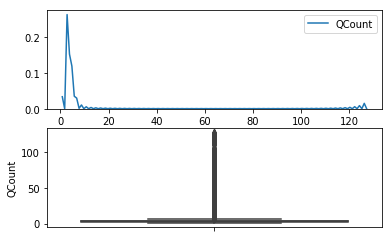

In [28]:
f, (ax1, ax2) = plt.subplots(2)
sns.kdeplot(temp['QCount'], ax=ax1)
sns.boxplot(x=None,y='QCount',data=temp, ax=ax2)

# sns.boxplot(x=None,y='QCount',data=temp)

Clearly, data contains outliers. We will remove them in order to make our analysis more robust.

In [29]:
print( 'Avg No. of words in a Search query:', round(temp['QCount'].mean(),2))
print( 'Median No. of words in a Search query:', temp['QCount'].quantile(0.5))
print('3rd Quantile No. of words in a Search query:', temp['QCount'].quantile(0.75))

Avg No. of words in a Search query: 2.99
Median No. of words in a Search query: 3.0
3rd Quantile No. of words in a Search query: 4.0


In [30]:
# Remove outliers by considering only queries with lengh < 10.0 (chosen randomly)

temp = temp[temp['QCount'] < 10.0]
print( 'Maximum Length of a Query: ', temp['QCount'].max())
print('Average Length of a Query: ', temp['QCount'].mean())

Maximum Length of a Query:  9
Average Length of a Query:  2.9498189918903743


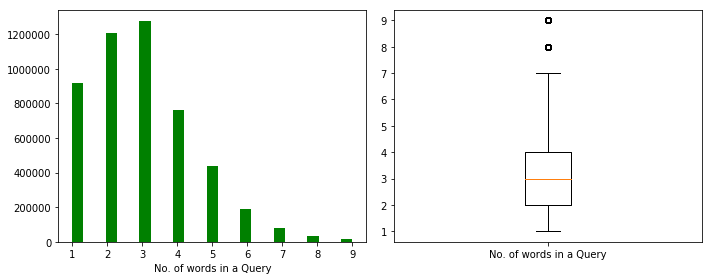

In [31]:
# This is the same plot as above just a little more readable since outliers were removed...

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(temp['QCount'],
         color='green',
         bins=25,
         normed=False)
plt.xlabel('No. of words in a Query')

plt.subplot(1, 2, 2)
plt.boxplot(temp['QCount'],
            labels=['No. of words in a Query'],
            )

plt.tight_layout()

Conclusion: 

75 % of search queries has less than 4.0 words.

In [32]:
# Let us study the distribution of no. of words in Ad description.

# Preparing Data...

temp = data[['DCount']].copy()

print ('Maximum Length of an Ad Description: ', temp['DCount'].max())
print ('Average Length of an Ad Description: ', temp['DCount'].mean())

Maximum Length of an Ad Description:  47
Average Length of an Ad Description:  21.311864812003535


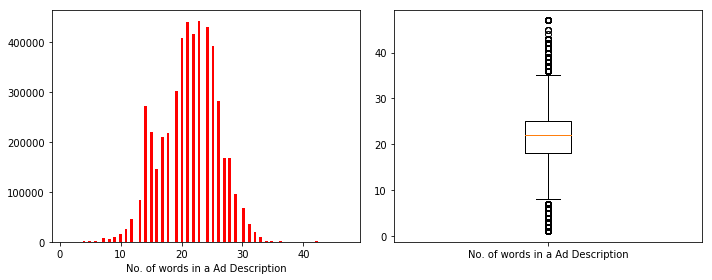

In [33]:
# Distribution of word count in description of an ad...

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(temp['DCount'],
         bins=100,
         color='red',
         normed=False)
plt.xlabel('No. of words in a Ad Description')

plt.subplot(1, 2, 2)
plt.boxplot(temp['DCount'],
            labels=['No. of words in a Ad Description'],
            )

plt.tight_layout()

In [34]:
print ('Median No. of words in a Ad description:', temp['DCount'].quantile(0.5))
print ('3rd Quantile No. of words in a Ad description:', temp['DCount'].quantile(0.75))

Median No. of words in a Ad description: 22.0
3rd Quantile No. of words in a Ad description: 25.0


Conclusion:

75 % of the Ads use <= 25.0 words for Ad description.

In [35]:
# Let us study the distribution of no. of words in Ad title.

# Preparing Data...

temp = data[['TCount']].copy()

print( 'Maximum Length of an Ad Title: ', temp['TCount'].max())
print('Average Length of an Ad Title: ', temp['TCount'].mean())

Maximum Length of an Ad Title:  32
Average Length of an Ad Title:  8.765298931359613


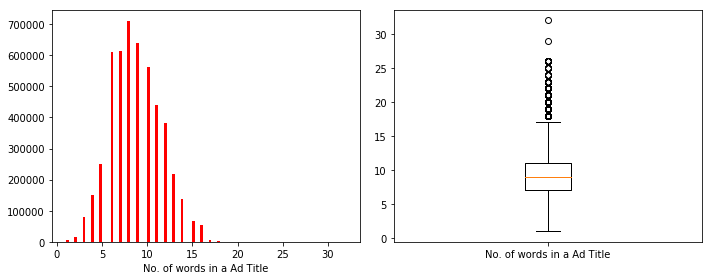

In [36]:
# Distribution of word count in a ad title...

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(temp['TCount'],
         color='red',
         bins=100,
         normed=False)
plt.xlabel('No. of words in a Ad Title')

plt.subplot(1, 2, 2)
plt.boxplot(temp['TCount'],
            labels=['No. of words in a Ad Title'],
            )

plt.tight_layout()

In [37]:
print( 'Median No. of words in a Ad title:', temp['TCount'].quantile(0.5))
print( '3rd Quantile No. of words in a Ad title:', temp['TCount'].quantile(0.75))

Median No. of words in a Ad title: 9.0
3rd Quantile No. of words in a Ad title: 11.0


Conclusion:

75 % of the Ads use < = 11.0 words in their Ad titles.

In [38]:
# How is no. of words in Search query affect Ad CTR...

# Preparing data...

temp = data[['QCount', 'CTR']].copy()
temp.head()

,QCount,CTR
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0


In [39]:
# We are considering only those queries which have less than 10.0 words.

temp = temp[temp['QCount'] < 10.0]

In [40]:
temp.shape[0] * 1.0 / data.shape[0] # 99.5% datapoints use less than 10 words in query...

0.9958146499971529

In [41]:
result = temp.groupby('QCount').agg(['mean'])
result.head()

,CTR
,mean
QCount,
1,3.707213
2,4.868142
3,4.902491
4,4.597467
5,4.271822


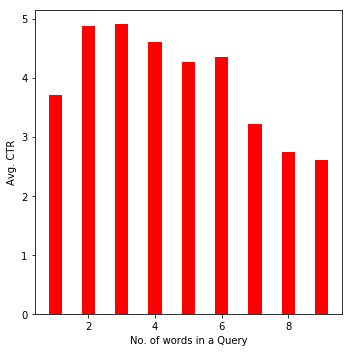

In [42]:
plt.figure(figsize=(5,5))

plt.bar(result.index, result[('CTR', 'mean')],
        color='red',
        width=0.4)
plt.xlabel('No. of words in a Query')
plt.ylabel('Avg. CTR')

plt.tight_layout()

Conclusion: As no. of words in a search query increases, typically CTR of Ads displayed falls.

In [43]:
# How is no. of words in Ad description affect Ad CTR...

# Preparing data...

temp = data[['DCount', 'CTR']].copy()

In [44]:
temp[temp['DCount'] >= 40.0].shape[0] * 1.0 / data.shape[0] # only 0.02 percent datapoints use >= 40 words in ad desc.

0.00029178514759078353

In [45]:
result = temp.groupby('DCount').agg(['mean'])
result.head()

,CTR
,mean
DCount,
1,1.204819
2,2.987421
3,3.093812
4,6.115780
5,4.799375


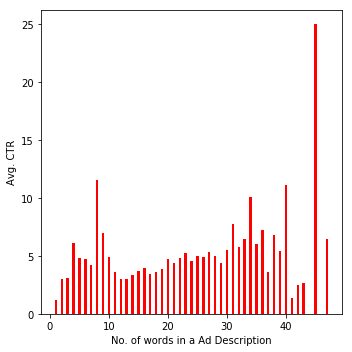

In [46]:
plt.figure(figsize=(5,5))

plt.bar(result.index, result[('CTR', 'mean')],
        color='red',
        width=0.4)
plt.xlabel('No. of words in a Ad Description')
plt.ylabel('Avg. CTR')

plt.tight_layout()

Conclusion: No. of words in Ad description doesn't give a clear picture of Ad CTR.

In [47]:
# How does no. of words in Ad Title affect Ad CTR...

# Preparing data...

temp = data[['TCount', 'CTR']].copy()

In [48]:
temp[temp['TCount'] >= 25.0].shape[0] * 1.0 / data.shape[0] # only 0.0005 percent datapoints use >= 25 words in ad title.

5.452040820035402e-06

In [49]:
result = temp.groupby('TCount').agg(['mean'])
result.head()

,CTR
,mean
TCount,
1,5.188903
2,5.468239
3,4.382002
4,4.484546
5,4.361038


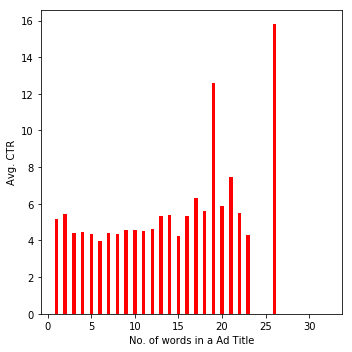

In [50]:
plt.figure(figsize=(5,5))

plt.bar(result.index, result[('CTR', 'mean')],
        color='red',
        width=0.4)
plt.xlabel('No. of words in a Ad Title')
plt.ylabel('Avg. CTR')

plt.tight_layout()

Conclusion: Avg. Ad CTR is more or less distributed uniformly with no. of words in Ad title.

In [51]:
# Does Ad Impresions affect Ad Clicks... (more impressions mean more click ?)

# Preparing data...

temp = data[['AdId', 'Impression', 'Click']].copy()
temp.head()

,AdId,Impression,Click
0,7686695,1,0
1,7686695,2,0
2,7686695,1,0
3,7686695,1,0
4,7686695,2,0


In [52]:
result = temp.groupby('AdId').agg(['mean'])
result.head(6)

,Impression,Click
,mean,mean
AdId,,
1000031,1.000000,0.000000
1000467,2.315789,0.105263
1000468,1.000000,0.000000
1000469,1.000000,0.000000
1000471,1.000000,0.000000
1000473,2.000000,0.000000


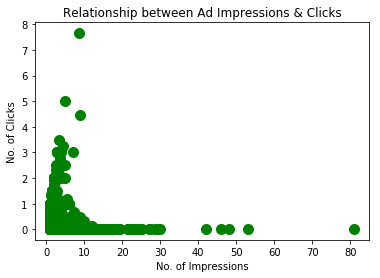

In [53]:
x = result[('Impression', 'mean')]
y = result[('Click', 'mean')]
plt.scatter(x,
            y,
            c='green',
            s=100,
            marker='o',
            edgecolor=None)
plt.xlabel('No. of Impressions')
plt.ylabel('No. of Clicks')
plt.title('Relationship between Ad Impressions & Clicks')

Conclusion: As no. of impressions of an advertisement inc. clicks are mostly ~ 0.

This indicates a very crucial aspect of human behaviour. As a user see the same ad again & again, they are less likely to click it.

In [54]:
# Let us see how Gender of a user has an impact on Ad CTR

# Preparing data...

temp = data[['Gender', 'CTR']].copy()
temp.head()

,Gender,CTR
0,1,0.0
1,1,0.0
2,2,0.0
3,0,0.0
4,2,0.0


In [55]:
result = temp.groupby('Gender').agg(['mean'])
result.head()

,CTR
,mean
Gender,
0,4.527559
1,4.409308
2,4.585996


In [56]:
# 1. Male, 2. Female, 3. Unknown

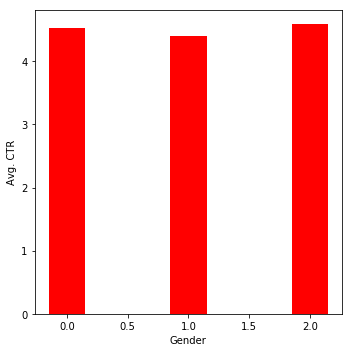

In [57]:
plt.figure(figsize=(5,5))

plt.bar(result.index, result[('CTR', 'mean')],
        color='red',
        width=0.3)
plt.xlabel('Gender')
plt.ylabel('Avg. CTR')

plt.tight_layout()

Conclusion: Gender of a user doesn't impact CTR of an advertisement.

In [58]:
# What about Age of a user...

# Preparing data...

temp = data[['Age', 'CTR']].copy()
temp.head()

,Age,CTR
0,3,0.0
1,3,0.0
2,5,0.0
3,2,0.0
4,5,0.0


In [59]:
temp[temp['Age'] > 4.0].shape[0] * 1.0 / data.shape[0] # 21 percent datapoints are in age group > 4.0

0.21332624164171854

In [60]:
result = temp.groupby('Age').agg(['mean'])
result.head(6)

,CTR
,mean
Age,
1,4.457391
2,4.525747
3,4.384555
4,4.232053
5,4.746470
6,5.256566


In [61]:
# Recall Age categories as follows:

# '1' : (0, 12]
# '2' : (12, 18]
# '3' : (18, 24]
# '4' : (24, 30]
# '5' : (30,  40]
# '6' : > 40.

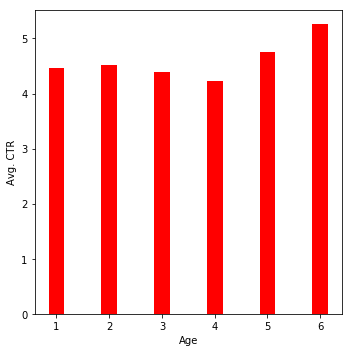

In [62]:
plt.figure(figsize=(5,5))

plt.bar(result.index, result[('CTR', 'mean')],
        color='red',
        width=0.3)
plt.xlabel('Age')
plt.ylabel('Avg. CTR')

plt.tight_layout()

Conclusion: An user in categories 5 & 6 has higher avg. CTR as compared to users in other categories.

In [63]:
# Since users in Age categories 5 & 6 have a higher CTR, let us try to find out 

# how does gender of a user in category 5 & 6 affect CTR of an ad...

# Preparing data...

temp = data[['Gender', 'Age', 'CTR']].copy()
temp = temp[(temp['Age'] == 5) | (temp['Age'] == 6)] # filter aged users.
temp.head()

,Gender,Age,CTR
2,2,5,0.0
4,2,5,0.0
6,1,6,0.0
14,2,5,0.0
49,2,5,0.0


In [64]:
temp[temp['Gender'] == 2.0].shape[0] * 1.0 / data.shape[0] # 9.3 percent users are old female.

0.09328482228568129

In [65]:
temp = temp[['Gender', 'CTR']].copy()
result = temp.groupby('Gender').agg(['mean'])
result.head()

,CTR
,mean
Gender,
0,4.277570
1,4.808067
2,5.025482


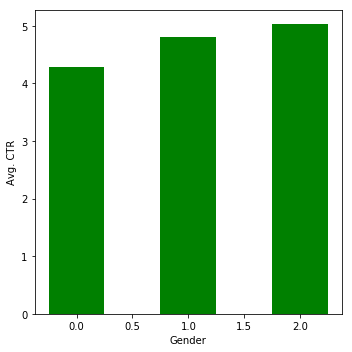

In [66]:
plt.figure(figsize=(5,5))

plt.bar(result.index, result[('CTR', 'mean')],
        color='green',
        width=0.5)
plt.xlabel('Gender')
plt.ylabel('Avg. CTR')

plt.tight_layout()

Conclusion: Female users (2) in Age categories 5 & 6 are more likely to click an Ad as opposed to their male (1) counterparts.

In [67]:
# Let us try to see if Ad position affects on Ad CTR...

# Preparing data...

temp = data[['Pos', 'CTR']].copy()
temp.head()

,Pos,CTR
0,3,0.0
1,2,0.0
2,2,0.0
3,3,0.0
4,3,0.0


In [68]:
result = temp.groupby('Pos').agg(['mean', 'count'])
result.head()

CTR         
         mean    count
Pos                   
1    5.518009  3022771
2    3.077325  1597657
3    1.894403   331846

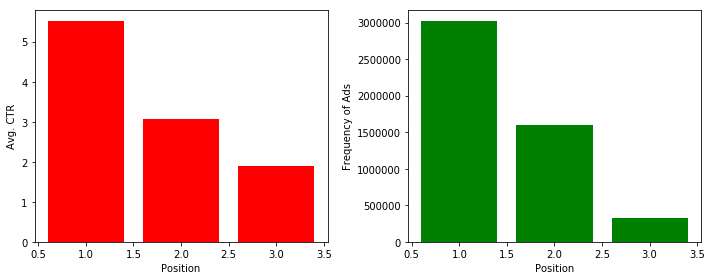

In [69]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.bar(result.index, result[('CTR', 'mean')],
        color='red')
plt.xlabel('Position')
plt.ylabel('Avg. CTR')

plt.subplot(1, 2, 2)
plt.bar(result.index, result[('CTR', 'count')],
        color='green')
plt.xlabel('Position')
plt.ylabel('Frequency of Ads')

plt.tight_layout()

Conclusion: Clearly, the CTR for an advertisement which has a low position (more visible to user) is higher as compared to CTR of an advertisement with higher position(not directly visible).

Typically advertisement have lower position. [1,2]

In [163]:
# Let us try to see if depth of a search session has an affect on CTR

# Preparing data...

temp = data[['Depth', 'CTR']].copy()
temp.head()

,Depth,CTR
0,3,0.0
1,2,0.0
2,2,0.0
3,3,0.0
4,3,0.0


In [164]:
result = temp.groupby('Depth').agg(['mean', 'count'])
result.head()

CTR         
           mean    count
Depth                   
1      4.577864  1450766
2      4.799309  2514678
3      3.561618   986830

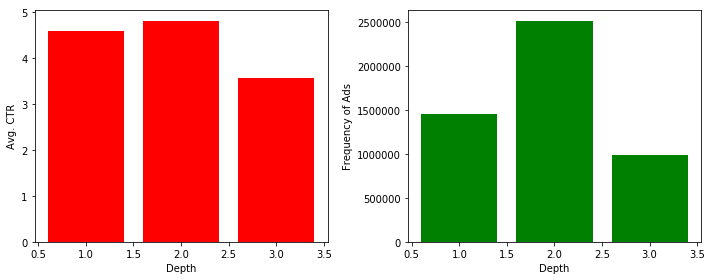

In [165]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.bar(result.index, result[('CTR', 'mean')],
        color='red')
plt.xlabel('Depth')
plt.ylabel('Avg. CTR')

plt.subplot(1, 2, 2)
plt.bar(result.index, result[('CTR', 'count')],
        color='green')
plt.xlabel('Depth')
plt.ylabel('Frequency of Ads')

plt.tight_layout()
plt.show()

Conclusion: 

1. Mostly depth of a Search Session is 2.
2. If depth if high (3) avg. CTR falls. This means if there as no. of ads in a Search Session inc. avg. CTR dec.

<h3> 3.2.2 Studying the role of Advertiser </h3>

<h4>3.2.2.1 : Studying the role of Advertiser based on Ad CTR </h4>

In [73]:

# We divide the data into two categories, one corr. to Advertisers who have a high CTR on their Ads & other who don't.

# Once we know who are the Advertisers with high CTR Ads, we can study how Ads by a high CTR Adv. differs from a Adv. 

# with low CTR Ads.

# e.g. We can know if an advertiser with high CTR ads use more words to describe ad, more words in the ad title etc...


In [74]:
# Preparing data...

temp = data[['AdvId', 'CTR', 'DCount', 'TCount']].copy()
temp.head()

,AdvId,CTR,DCount,TCount
0,385,0.0,21,8
1,385,0.0,21,8
2,385,0.0,21,8
3,385,0.0,21,8
4,385,0.0,21,8


In [75]:
result = temp.groupby('AdvId').agg(['mean'])
result.head()

,CTR,DCount,TCount
,mean,mean,mean
AdvId,,,
78,0.000000,2.000000,3.000000
80,0.000000,2.000000,3.000000
81,7.317073,26.000000,11.000000
82,3.693460,22.000000,5.000000
83,3.378378,17.783784,5.081081


In [76]:
temp = pd.DataFrame()

temp['AdvId']    = result.index
temp['CTR']      = result[('CTR', 'mean')].get_values()
temp['DCount']   = result[('DCount', 'mean')].get_values()
temp['TCount']   = result[('TCount', 'mean')].get_values()

temp.head()

,AdvId,CTR,DCount,TCount
0,78,0.000000,2.000000,3.000000
1,80,0.000000,2.000000,3.000000
2,81,7.317073,26.000000,11.000000
3,82,3.693460,22.000000,5.000000
4,83,3.378378,17.783784,5.081081


In [77]:
print( 'No. of unique advertisers: ',temp.shape[0] )

No. of unique advertisers:  13921


In [78]:
# The burning question...

# How to decide if an Advertiser is a high CTR Advertiser ? 

# Let us study the distribution of avg. Ad CTRs corr. to Advertisers...

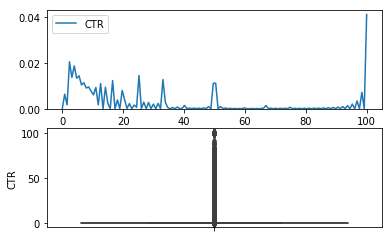

In [161]:
f, (ax1, ax2) = plt.subplots(2)
sns.kdeplot(temp['CTR'], ax=ax1)
sns.boxplot(x=None,y='CTR',data=temp, ax=ax2)
plt.show()

In [80]:
mean_advertiser_ctr = temp['CTR'].mean()
print ('Average CTR of Ads given by an advertiser: ', round(mean_advertiser_ctr, 2))

median_advertiser_ctr = temp['CTR'].median()
print( 'Median CTR of Ads given by an advertiser: ', round(median_advertiser_ctr, 2))

third_quantile_advertiser_ctr = temp['CTR'].quantile(0.75)
print( '3rd Quantile CTR of Ads given by an advertiser: ', round(third_quantile_advertiser_ctr, 2))

Average CTR of Ads given by an advertiser:  3.94
Median CTR of Ads given by an advertiser:  2.41
3rd Quantile CTR of Ads given by an advertiser:  5.13


In [81]:
# Let us define 'High CTR Advertiser' as - an advertiser whose ad CTR > 3rd quantile Advertiser CTR

In [82]:
temp['HighCTR'] = temp['CTR'] > third_quantile_advertiser_ctr
temp.head()

,AdvId,CTR,DCount,TCount,HighCTR
0,78,0.000000,2.000000,3.000000,False
1,80,0.000000,2.000000,3.000000,False
2,81,7.317073,26.000000,11.000000,True
3,82,3.693460,22.000000,5.000000,False
4,83,3.378378,17.783784,5.081081,False


In [83]:
temp['HighCTR'].value_counts() # Clearly, an imbalanced dataset...

False    10457
True      3464
Name: HighCTR, dtype: int64

In [84]:
# Out of 13921 Advertisers, only 3464 Advertisers have Ads. with CTR > 5.13 %.

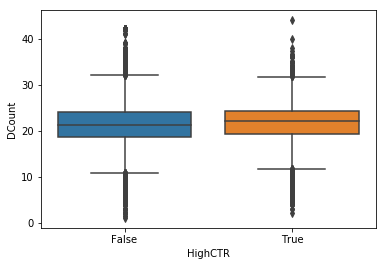

In [160]:
# Does an Advertiser with high CTR Ads uses more words to describe their Ads...

sns.boxplot(x='HighCTR', y='DCount', data=temp)
#sns.violinplot(x='HighCTR', y='DCount', data=temp)
plt.show()

In [86]:
(temp[['HighCTR', 'DCount']].copy()).groupby('HighCTR').agg(['median'])

,DCount
,median
HighCTR,
False,21.023529
True,21.476378


Conclusion: Median no. of words in the description of an Ad for high CTR advertiser (21.47) is slightly more as compared to a low CTR advertiser(21.02).

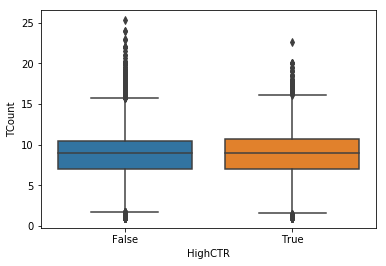

In [159]:
# Does an Advertiser with high CTR Ads uses more words in Ad title...

sns.boxplot(x='HighCTR', y='TCount', data=temp)
#sns.violinplot(x='HighCTR', y='DCount', data=temp)
plt.show()

In [88]:
(temp[['HighCTR', 'TCount']].copy()).groupby('HighCTR').agg(['median'])

,TCount
,median
HighCTR,
False,8.5
True,8.7


Conclusion: Median no. of words in the title of an Ad for high CTR advertiser is slightly high (8.7) than a low CTR advertiser (8.5).

##### Takeaway:

Advertisers who have high CTRs use alomost same median no. of words in the title & description of their ads as an advertiser with low CTR which is intuitive. Why ? Because typically limited display space is given to every Ad irrespective of the Advertiser. Then why some Advertisers have High CTR ? 

There are various reasons we can think off:

1. High Quality content in Ads
2. Product sold by an Advertiser can have high demand when data was collected.

In [89]:
# Do high CTR Advertisers have more impressions of their advertisements (i.e are they frequent advertisers)...

# Intuition says they should be, lets find out...

interim = data[['AdvId','Impression']].copy()
interim.head()

,AdvId,Impression
0,385,1
1,385,2
2,385,1
3,385,1
4,385,2


In [90]:
result = interim.groupby('AdvId').agg(['sum', 'count'])
result.head()

Impression      
             sum count
AdvId                 
78             1     1
80             1     1
81            98    82
82          5230  3651
83            63    37

In [91]:

# How to intepret above figure ? Advertisements by Adv. Id 82 were displayed 5230 times across 3651 user queries.


In [92]:
temp['Impression'] = result[('Impression', 'sum')].get_values()
temp['Count']      = result[('Impression', 'count')].get_values()
temp.head()

,AdvId,CTR,DCount,TCount,HighCTR,Impression,Count
0,78,0.000000,2.000000,3.000000,False,1,1
1,80,0.000000,2.000000,3.000000,False,1,1
2,81,7.317073,26.000000,11.000000,True,98,82
3,82,3.693460,22.000000,5.000000,False,5230,3651
4,83,3.378378,17.783784,5.081081,False,63,37


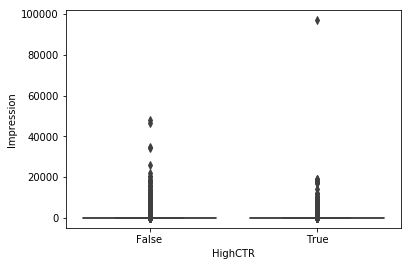

In [158]:
# d = temp[temp['Net_Impr'] < 2]
sns.boxplot(x='HighCTR', y='Impression', data=temp)
plt.show()

In [94]:
# Clearly there are outliers in data. Let us take 3rd quantile value to be robust in our estimate.

In [95]:
(temp[['HighCTR', 'Impression']].copy()).groupby('HighCTR').agg(['mean', 'median'])

Impression       
               mean median
HighCTR                   
False    380.769245     53
True     589.980370     49

Conclusion: A High CTR Advertiser has higher avg. impressions(590.0) as opposed to a low CTR Advertiser (381.0). However median no. of impressions for a High CTR Advertiser is lower (49) as opposed to a low CTR Advertiser(53).

<h4>3.2.2.2 : Studying the role of Advertiser based on Ad Frequency </h4>

In [96]:

# We divide the data into two categories, each corr. to frequent & infrequent Advertisers.

# Once we have divided the data,we can study how Ads by a frequent Advertiser differs from a infrequent Advertiser.

# e.g. We can know if an frequent advertiser use more words to describe ad, more words in the ad title etc...


In [97]:

# The burning question...

# How to decide if an Advertiser is a frequent Advertiser or not? 

# There are two ways we can do this.. based on 1. Impression 2. Count

# Advertiser Impression: total no. of impressions of all Ads by an Adv. 

# Advertiser Count: total no. training entries all Ads by an Adv.

# We choose Advertiser Impression as a criteria for deciding if an Advertiser is frequent or not.

# Let us study the distribution of Advertiser Impressions... 


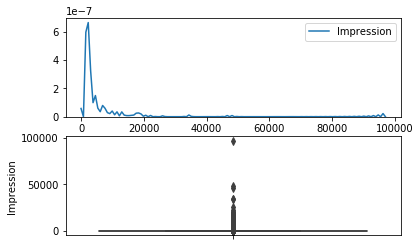

In [157]:
f, (ax1, ax2) = plt.subplots(2)
sns.kdeplot(temp['Impression'], ax=ax1)
sns.boxplot(x=None,y='Impression',data=temp, ax=ax2)
plt.show()

In [99]:
mean_advertiser_impression = temp['Impression'].mean()
print ('Average Advertiser Impression: ', round(mean_advertiser_impression, 2))

median_advertiser_impression = temp['Impression'].median()
print ('Median Advertiser Impression: ', round(median_advertiser_impression, 2))

third_quantile_advertiser_impression = temp['Impression'].quantile(0.75)
print( '3rd Quantile Advertiser Impression: ', round(third_quantile_advertiser_impression, 2))

Average Advertiser Impression:  432.83
Median Advertiser Impression:  51.0
3rd Quantile Advertiser Impression:  152.0


In [100]:
# Let us define 'Frequent Advertiser' as - advertiser with Advertiser Impression > 3rd quantile Advertiser Impression.

In [101]:
temp['IsFrequent'] = temp['Count'] > third_quantile_advertiser_impression
temp.head()

,AdvId,CTR,DCount,TCount,HighCTR,Impression,Count,IsFrequent
0,78,0.000000,2.000000,3.000000,False,1,1,False
1,80,0.000000,2.000000,3.000000,False,1,1,False
2,81,7.317073,26.000000,11.000000,True,98,82,False
3,82,3.693460,22.000000,5.000000,False,5230,3651,True
4,83,3.378378,17.783784,5.081081,False,63,37,False


In [102]:
temp['IsFrequent'].value_counts() # Clearly, there is an imbalance since we chose 3rd quantile Adv. Impr. as threshold.

False    10887
True      3034
Name: IsFrequent, dtype: int64

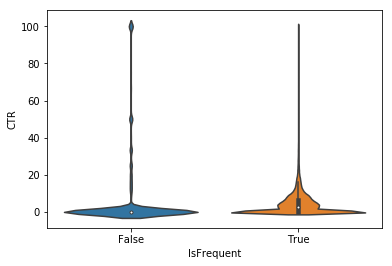

In [156]:
# Does a frequent advertiser has higher avg. CTR...

# Intuitively they should, lets investigate.

sns.violinplot(x='IsFrequent',y='CTR',data=temp)
plt.show()

In [104]:
(temp[['IsFrequent', 'CTR']].copy()).groupby('IsFrequent').agg(['mean', 'median'])

CTR          
                mean    median
IsFrequent                    
False       3.889416  1.587302
True        4.144337  3.506866

Conclusion: A frequent advertiser has higher median CTR(3.58%) & avg. CTR(4.14%) as compared to an infrequent advertiser with 1.58% median CTR & 3.8% avg. CTR. Why it that ? This is very intuitive. How ? 

An Advertiser being frequent tantamounts to higher CTR else he/she wouldn't be frequent in the first place.
Why on earth would an advertiser want to show their Ads if more impressions isn't generating revenue for the advertiser.

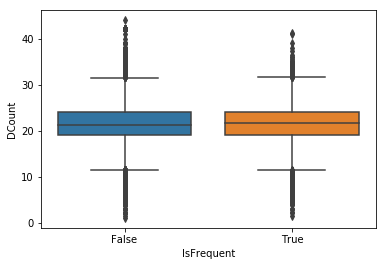

In [155]:
# Does a frequent Advertiser use more words to describe their Ads...

sns.boxplot(x='IsFrequent', y='DCount', data=temp)
#sns.violinplot(x='HighCTR', y='DCount', data=temp)
plt.show()

In [106]:
(temp[['IsFrequent', 'DCount']].copy()).groupby('IsFrequent').agg(['median'])

,DCount
,median
IsFrequent,
False,21.000000
True,21.502765


Conclusion: Median no. of words in the Ad description for frequent advertiser is slightly high (21.5) than a infrequent advertiser(21.0).

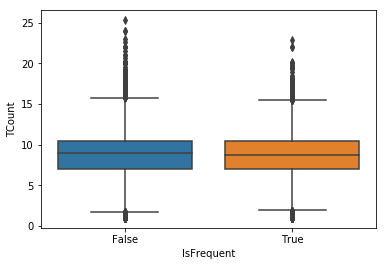

In [154]:
# Does a frequent Advertiser use more words to describe their Ads...

sns.boxplot(x='IsFrequent', y='TCount', data=temp)
#sns.violinplot(x='HighCTR', y='DCount', data=temp)
plt.show()

In [108]:
(temp[['IsFrequent', 'TCount']].copy()).groupby('IsFrequent').agg(['median'])

,TCount
,median
IsFrequent,
False,8.446429
True,8.872962


Conclusion: Median no. of words in the Ad Title for frequent advertiser is slightly high (8.9) than a infrequent advertiser(8.4).

<h3> 3.2.3 Studying Ads irrespective of Advertisers </h3>

<h4> 3.2.3.1 Studying Ad properties based on Ad CTR </h4>

In [110]:


# We divide the data into two categories, one corr. to Ads with high CTR & other corr. to Ads with low CTR.

# Once this is done, we can investigate how an Ad with high CTR differs from an Ad with low CTR.


In [111]:
# What is my goal ? To study properties of Advertisements.

# What questions I intend to answer ? 

# 1. How does no. of words in Ad Description vary with CTR of an Ad ? 

# 2. How does no. of words in Ad Title vary with CTR of an Ad ? 

# 3. How is the Ad frequency related to no. of words used in Ad description ? 

# 4. How is the Ad frequency related to no. of words used in Ad title ? 

# 5. How is the Ad frequency related to Ad Position ? 

# 6. How is the Ad frequency related to Ad Depth ? 

# 7. How is the Ad frequency related to Ad Clicks ? Does more Ad impressions mean more clicks ? 

# 8. Does frequency of an Ad has an effect on CTR of the Ad ? 


In [112]:
# Preparing Data for Analysis....

temp = data[['AdId', 'CTR', 'Pos', 'Depth', 'QCount', 'DCount', 'TCount']].copy()

In [113]:
result = temp.groupby('AdId').agg(['mean'])
result.head()

,CTR,Pos,Depth,QCount,DCount,TCount
,mean,mean,mean,mean,mean,mean
AdId,,,,,,
1000031,0.000000,2.000000,2.000000,5.000000,18.000000,6.0
1000467,6.578947,1.947368,2.052632,2.421053,17.947368,5.0
1000468,0.000000,1.000000,2.000000,1.000000,17.000000,5.0
1000469,0.000000,2.000000,2.000000,2.000000,17.000000,5.0
1000471,0.000000,1.500000,1.750000,2.625000,17.875000,5.0


In [114]:
temp = pd.DataFrame()

temp['AdId']   = result.index
temp['CTR']    = result[('CTR', 'mean')].get_values()
temp['Pos']    = result[('Pos', 'mean')].get_values()
temp['Depth']  = result[('Depth', 'mean')].get_values()
temp['DCount'] = result[('DCount', 'mean')].get_values()
temp['TCount'] = result[('TCount', 'mean')].get_values()

temp.head()

,AdId,CTR,Pos,Depth,DCount,TCount
0,1000031,0.000000,2.000000,2.000000,18.000000,6.0
1,1000467,6.578947,1.947368,2.052632,17.947368,5.0
2,1000468,0.000000,1.000000,2.000000,17.000000,5.0
3,1000469,0.000000,2.000000,2.000000,17.000000,5.0
4,1000471,0.000000,1.500000,1.750000,17.875000,5.0


In [115]:
interim = data[['AdId', 'Impression', 'Click']].copy()
iresult = interim.groupby('AdId').agg(['sum'])
iresult.head()

,Impression,Click
,sum,sum
AdId,,
1000031,1,0
1000467,44,2
1000468,1,0
1000469,1,0
1000471,8,0


In [116]:
temp['Impression'] = iresult[('Impression', 'sum')].get_values()
temp['Click']      = iresult[('Click', 'sum')].get_values()
temp.head()

,AdId,CTR,Pos,Depth,DCount,TCount,Impression,Click
0,1000031,0.000000,2.000000,2.000000,18.000000,6.0,1,0
1,1000467,6.578947,1.947368,2.052632,17.947368,5.0,44,2
2,1000468,0.000000,1.000000,2.000000,17.000000,5.0,1,0
3,1000469,0.000000,2.000000,2.000000,17.000000,5.0,1,0
4,1000471,0.000000,1.500000,1.750000,17.875000,5.0,8,0


In [117]:
print ('No. of unique advertisements: ',temp.shape[0] )

No. of unique advertisements:  212422


In [118]:

# The burning question...

# How to decide if an Ad qualifies as a high CTR Advertisment ? 

# Let us study the distribution of avg. Ad CTRs...


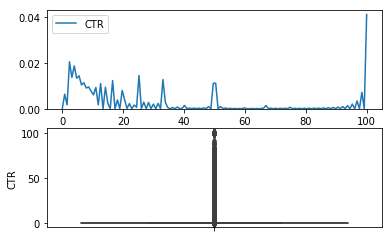

In [146]:
f, (ax1, ax2) = plt.subplots(2)
sns.kdeplot(temp['CTR'], ax=ax1)
sns.boxplot(x=None,y='CTR',data=temp, ax=ax2)
plt.show()

In [120]:
mean_ad_ctr = temp['CTR'].mean()
print ('Average CTR of Ads : ', round(mean_ad_ctr, 2))

median_ad_ctr = temp['CTR'].median()
print ('Median CTR of Ads : ', round(median_ad_ctr, 2))

third_quantile_ad_ctr = temp['CTR'].quantile(0.75)
print ('3rd Quantile CTR of Ads: ', round(third_quantile_ad_ctr, 2))

Average CTR of Ads :  5.01
Median CTR of Ads :  0.0
3rd Quantile CTR of Ads:  0.0


In [121]:
# Since median & 3rd quantile avg. CTR is 0.0 using it as a threshold is meaningless. So, let us use 

# Avg. Ad CTR as a threshold for deciding if an ad is qualified as a high CTR ad or not.

In [122]:
temp['HighCTR'] = temp['CTR'] > mean_ad_ctr
temp.head()

,AdId,CTR,Pos,Depth,DCount,TCount,Impression,Click,HighCTR
0,1000031,0.000000,2.000000,2.000000,18.000000,6.0,1,0,False
1,1000467,6.578947,1.947368,2.052632,17.947368,5.0,44,2,True
2,1000468,0.000000,1.000000,2.000000,17.000000,5.0,1,0,False
3,1000469,0.000000,2.000000,2.000000,17.000000,5.0,1,0,False
4,1000471,0.000000,1.500000,1.750000,17.875000,5.0,8,0,False


In [123]:
temp['HighCTR'].value_counts() # Clearly, an imbalanced dataset...

False    177184
True      35238
Name: HighCTR, dtype: int64

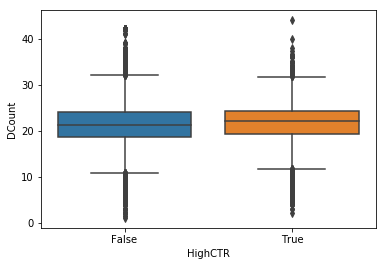

In [147]:
# How does Ad CTR affect no. of words in Ad description...

sns.boxplot(x='HighCTR', y='DCount', data=temp)
#sns.violinplot(x='HighCTR', y='DCount', data=temp)
plt.show()

In [125]:
(temp[['HighCTR', 'DCount']].copy()).groupby('HighCTR').agg(['median'])

,DCount
,median
HighCTR,
False,21.111111
True,22.000000


Conclusion: Description of an Ad with high CTR typically has a higher median no. of words (22.0) as compared to a low CTR Ad(21.0).

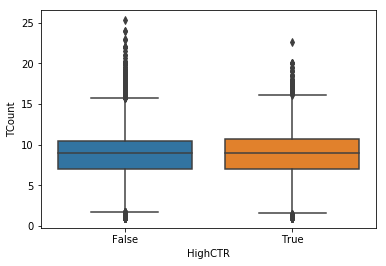

In [148]:
# How does Ad CTR affect no. of words in Ad Title...

sns.boxplot(x='HighCTR', y='TCount', data=temp)
# sns.violinplot(x='HighCTR', y='TCount', data=temp)
plt.show()

In [127]:
(temp[['HighCTR', 'TCount']].copy()).groupby('HighCTR').agg(['median'])

,TCount
,median
HighCTR,
False,9.0
True,9.0


Conclusion: Title of an Ad with high CTR typically has equal median no. of words (9.0) as a low CTR Ad.

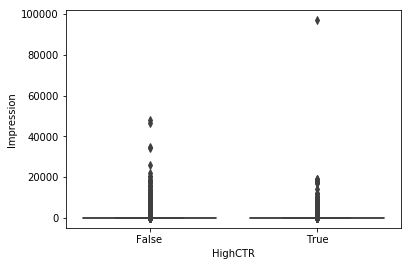

In [149]:
# Do high CTR Ads have more no. of impressions...

# Intuition says they should be, lets find out...

sns.boxplot(x='HighCTR', y='Impression', data=temp)
plt.show()

In [129]:
(temp[['HighCTR', 'Impression']].copy()).groupby('HighCTR').agg(['mean', 'median'])

Impression       
              mean median
HighCTR                  
False    23.909360      3
True     50.770191      9

Conclusion: A High CTR Ad has higher avg. impressions(50.8) & median impressions(9.0) as opposed to a low CTR Ad with avg. impressions of 23.90 & median impressions of 3.0

In [130]:

# Part 3.2 Studying Ad properties based on Ad frequency...


In [131]:

# The burning question...

# How to decide if an Ad is frequent or not? 

# There are two ways we can do this.. based on 1. Impression 2. Count

# Ad Impression: total no. of impressions of an Ad across all entries in the training file. 

# Ad Count: total no. of training entries in which Ad appeared.

# We choose Ad Impression as a criteria for deciding if an Ad is frequent or not.

# Let us study the distribution of Ad Impressions... 


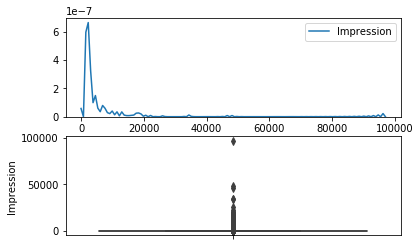

In [150]:
f, (ax1, ax2) = plt.subplots(2)
sns.kdeplot(temp['Impression'], ax=ax1)
sns.boxplot(x=None,y='Impression',data=temp, ax=ax2)
# sns.boxplot(x=None,y='Impression',data=temp)
plt.show()

In [133]:
mean_ad_impression = temp['Impression'].mean()
print ('Avg. impresssions of an Ad: ', round(mean_ad_impression))

median_ad_impression = temp['Impression'].median()
print ('Median impresssions of an Ad: ', round(median_ad_impression))

third_quantile_ad_impression = temp['Impression'].quantile(0.75)
print ('3rd quantile impresssions of an Ad: ', round(third_quantile_ad_impression))

Avg. impresssions of an Ad:  28
Median impresssions of an Ad:  3
3rd quantile impresssions of an Ad:  10


In [134]:
# Let us define 'Frequent Ad' as - an Ad with Ad Impression > 3rd quantile Ad Impression.

In [135]:
temp['IsFrequent'] = temp['Impression'] > third_quantile_ad_impression
temp.head()

,AdId,CTR,Pos,Depth,DCount,TCount,Impression,Click,HighCTR,IsFrequent
0,1000031,0.000000,2.000000,2.000000,18.000000,6.0,1,0,False,False
1,1000467,6.578947,1.947368,2.052632,17.947368,5.0,44,2,True,True
2,1000468,0.000000,1.000000,2.000000,17.000000,5.0,1,0,False,False
3,1000469,0.000000,2.000000,2.000000,17.000000,5.0,1,0,False,False
4,1000471,0.000000,1.500000,1.750000,17.875000,5.0,8,0,False,False


In [136]:
temp['IsFrequent'].value_counts() # Dataset is balanced.

False    160853
True      51569
Name: IsFrequent, dtype: int64

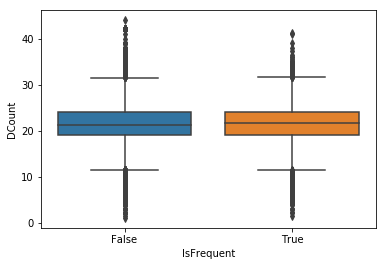

In [151]:
# How does Ad frequency affect no. of words in Ad description...

sns.boxplot(x='IsFrequent', y='DCount', data=temp)
#sns.violinplot(x='HighCTR', y='DCount', data=temp)
plt.show()

In [138]:
(temp[['IsFrequent', 'DCount']].copy()).groupby('IsFrequent').agg(['median'])

,DCount
,median
IsFrequent,
False,21.285714
True,21.608696


Conclusion: Description of a frequent Ad has a slightly higher median no. of words (22.0) as compared to a infrequent Ad (21.0).

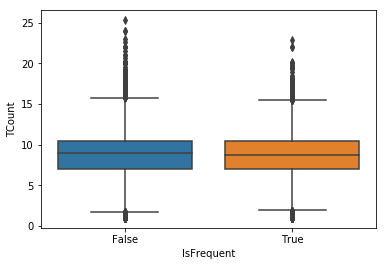

In [152]:
# How does Ad frequency affect no. of words in Ad title...

sns.boxplot(x='IsFrequent', y='TCount', data=temp)
#sns.violinplot(x='HighCTR', y='DCount', data=temp)
plt.show()

In [140]:
(temp[['IsFrequent', 'TCount']].copy()).groupby('IsFrequent').agg(['median'])

,TCount
,median
IsFrequent,
False,9.000000
True,8.764706


Conclusion: Title of a frequent Ad has a almost equal median no. of words (8.7) as compared to a infrequent Ad (9.0).

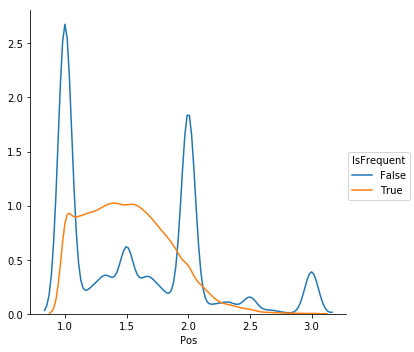

In [141]:
# How does Ad frequency affect Ad position..

sns.FacetGrid(temp, hue="IsFrequent", size=5) \
   .map(sns.kdeplot, "Pos") \
   .add_legend()
plt.show()

Conclusion: infrequent & frequenct ads usually occupy similar positions which is mostly positions 1 & 2.

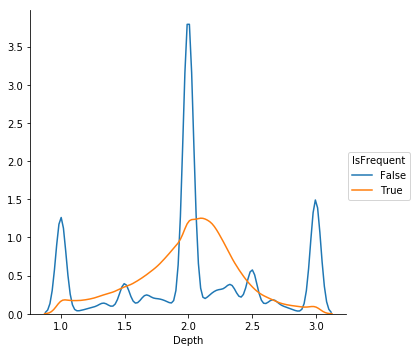

In [142]:
# How does Ad frequency affect Ad Depth...

sns.FacetGrid(temp, hue="IsFrequent", size=5) \
   .map(sns.kdeplot, "Depth") \
   .add_legend()
plt.show()

Conclusion: infrequent advertisement occur mostly in search sessions with depths is 2. On the other hand occurence of a frequent advertisement is distributed normally (not exactly) across all depths.

Conclusion: If an advertisement is infrequent it has less no. of clicks as compared to an frequent advertisement. 
Why is that ? It is very intuitive. How ? Ad is infrequent in the first place becuase it has low CTR hence low no. of clicks.


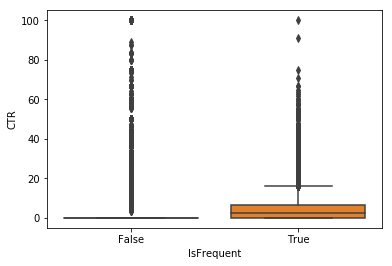

In [153]:
# Do frequent Ads have higher CTR...

# Intuition says they should be, lets find out...

sns.boxplot(x='IsFrequent', y='CTR', data=temp)
plt.show()

In [144]:
# Clearly there are outliers so we will use median CTR to decide this...

(temp[['IsFrequent', 'CTR']].copy()).groupby('IsFrequent').agg(['median'])

,CTR
,median
IsFrequent,
False,0.000000
True,2.362205


Frequent Ads have higher median CTR (2.36) as opposed to infrequent Ads (0.0) which is intuitive.

In [145]:

# Takeaways:

# 1. Ads at lower positions have higher avg. CTR so we have included a feature mPosCTR.

# 2. Frequent advertisers have higher avg. CTR as we included feature mAdvCTR.

# 3. Frequents ads have higher avg. CTR so we have included feature mAdCTR. 
